<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/Adaboosting_Demo_Dynamic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [86]:
df=pd.DataFrame()
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['lable']=[1,1,0,1,0,1,0,1,0,0]

In [87]:
df

,x1,x2,lable
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [88]:
df['weight']=1/df.shape[0]

**Create Decision tree**

In [89]:
def create_decision_tree(df):
  dt=DecisionTreeClassifier(max_depth=1)
  X=df.iloc[:,0:2].values
  y=df.iloc[:,2].values
  dt.fit(X,y)
  return dt

**Plot Decision Tree**

In [90]:
def plot_decion_tree(df):
  dt=create_decision_tree(df)

  X=df.iloc[:,0:2].values
  y=df.iloc[:,2].values

  plot_decision_regions(X,y,clf=dt,legend=2)



**Plot Tree Graph**

In [91]:
def plot_decion_treegraph(df):
  dt=create_decision_tree(df)
  plot_tree(dt)

**Get Data Frame After Prediction**

In [92]:
def predit_details(df):
  dt=create_decision_tree(df)
  X=df.iloc[:,0:2].values
  df['y_pred']=dt.predict(X)
  return df


**Calculate Weight of Model & Update Model & calculate range**

In [93]:
def calculaate_weight_model(error):
  return 0.5*np.log((1-error)/(error))

In [116]:
def update_row_weight(row,alpha=0.69):
  if row['lable']==row['y_pred']:
    return row['weight']*np.exp(-alpha)
  else:
    return row['weight']*np.exp(alpha)

In [95]:
def update_weght_and_get_new_range(df):
  df['update_weight']=df.apply(update_row_weight,axis=1)
  df['normalized_weight']=df['update_weight']/df['update_weight'].sum()
  df['cumsum_upper']=np.cumsum(df['normalized_weight'])
  df['cumsum_lower']=df['cumsum_upper']-df['normalized_weight']
  df[['x1','x2','lable','weight','update_weight','normalized_weight','cumsum_lower','cumsum_upper']]

  return df

**generate Random Number ->to get New Index for next data frame**

In [96]:
def create_new_dataset(df):
  indices=[]

  for i in range(df.shape[0]):
    a=np.random.random()
    for index, row in df.iterrows():
      if row['cumsum_upper'] >a and a >row['cumsum_lower']:
        indices.append(index)

  return indices


**First Decision Stumps**

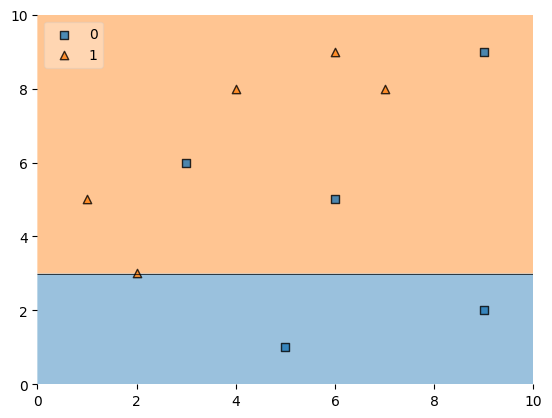

In [102]:
dt=create_decision_tree(df)
plot_decion_tree(df)

In [103]:
predit_details(df)

,x1,x2,lable,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [104]:
alpha1=calculaate_weight_model(0.3)

In [105]:
alpha1

np.float64(0.42364893019360184)

In [106]:
update_weght_and_get_new_range(df)

,x1,x2,lable,weight,y_pred,update_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065705,0.071689,0.071689,0.000000
1,2,3,1,0.1,1,0.065705,0.071689,0.143378,0.071689
2,3,6,0,0.1,1,0.152196,0.166059,0.309437,0.143378
3,4,8,1,0.1,1,0.065705,0.071689,0.381126,0.309437
4,5,1,0,0.1,0,0.065705,0.071689,0.452815,0.381126
5,6,9,1,0.1,1,0.065705,0.071689,0.524505,0.452815
6,6,5,0,0.1,1,0.152196,0.166059,0.690563,0.524505
7,7,8,1,0.1,1,0.065705,0.071689,0.762252,0.690563
8,9,9,0,0.1,1,0.152196,0.166059,0.928311,0.762252
9,9,2,0,0.1,0,0.065705,0.071689,1.000000,0.928311


In [107]:
index_values=create_new_dataset(df)

In [108]:
index_values

[5, 8, 2, 3, 4, 8, 2, 2, 4, 1]

**Second Decision Stumps**

In [109]:
seacond_df=df.iloc[index_values,[0,1,2,3]]

In [110]:
seacond_df

,x1,x2,lable,weight
5,6,9,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1


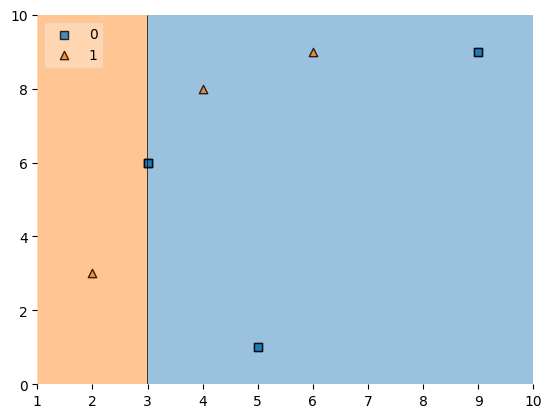

In [111]:
dt2=create_decision_tree(seacond_df)
plot_decion_tree(seacond_df)

In [112]:
predit_details(seacond_df)

,x1,x2,lable,weight,y_pred
5,6,9,1,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0
1,2,3,1,0.1,1


In [114]:
alpha2=calculaate_weight_model(0.2)

In [115]:
alpha2

np.float64(0.6931471805599453)

In [117]:
update_weght_and_get_new_range(seacond_df)

,x1,x2,lable,weight,y_pred,update_weight,normalized_weight,cumsum_upper,cumsum_lower
5,6,9,1,0.1,0,0.199372,0.249213,0.249213,0.000000
8,9,9,0,0.1,0,0.050158,0.062697,0.311910,0.249213
2,3,6,0,0.1,0,0.050158,0.062697,0.374607,0.311910
3,4,8,1,0.1,0,0.199372,0.249213,0.623820,0.374607
4,5,1,0,0.1,0,0.050158,0.062697,0.686517,0.623820
8,9,9,0,0.1,0,0.050158,0.062697,0.749213,0.686517
2,3,6,0,0.1,0,0.050158,0.062697,0.811910,0.749213
2,3,6,0,0.1,0,0.050158,0.062697,0.874607,0.811910
4,5,1,0,0.1,0,0.050158,0.062697,0.937303,0.874607
1,2,3,1,0.1,1,0.050158,0.062697,1.000000,0.937303


**Third Decion Stumps**

In [121]:
index_values=create_new_dataset(seacond_df)
t_df=df.iloc[index_values,[0,1,2,3]]

In [122]:
t_df

,x1,x2,lable,weight
4,5,1,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1


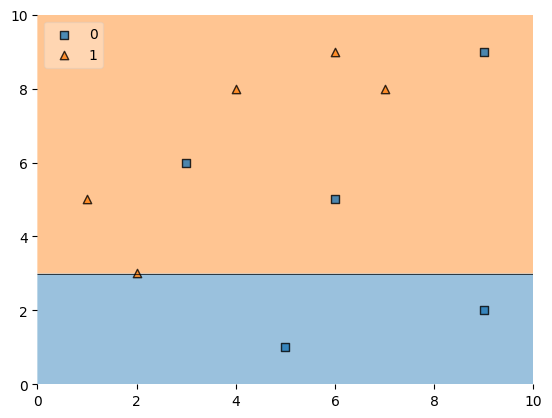

In [129]:
dt3=create_decision_tree(t_df)
plot_decion_tree(df)


In [130]:
predit_details(t_df)


,x1,x2,lable,weight,y_pred
4,5,1,0,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,1
5,6,9,1,0.1,1
4,5,1,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,0
3,4,8,1,0.1,1


In [131]:
alpha3=calculaate_weight_model(0.1)


**Prediction**

In [125]:
query=np.array([1,5]).reshape(1,2)

In [126]:
dt.predict(query)

array([1])

In [127]:
dt2.predict(query)

array([1])

In [128]:
dt3.predict(query)

array([0])

In [132]:
alpfinal=alpha1*1+alpha2*1+alpha3*-1

In [133]:
np.sign(alpfinal)

np.float64(1.0)